In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

import utils.compressed_sensing as cs
import torch.nn as nn
import torch

import os
import torch.nn.functional as F

from utils.dataset import anatomy_data
from utils.general import init_seeds
from torch.utils.data import DataLoader
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

from utils.model import LDA_vis


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch_size = 2

brain_dataset = anatomy_data('data/brain/brain_singlecoil_train.mat', acc=6)
brain_loader = DataLoader(brain_dataset, batch_size=batch_size, shuffle=True)

knee_dataset = anatomy_data('data/knee/knee_singlecoil_train.mat', acc=5)
knee_loader = DataLoader(knee_dataset, batch_size=batch_size, shuffle=True)

In [14]:
PSNR_list = []
with torch.no_grad():
    for i, data in enumerate(brain_loader):
        # undersampled image, k-space, mask, original image, original k-space
        im_und, k_und, mask, img_gnd, k_gnd = data
        # print(im_und.shape, k_und.shape, mask.shape, img_gnd.shape, k_gnd.shape)
        
        im_und = im_und.to(device)
        k_und = k_und.to(device)
        mask = mask.to(device)
        img_gnd = img_gnd.to(device)
        k_gnd = k_gnd.to(device)    
        
        # forward pass
        #output, _ = model1(im_und, k_und, mask)
        #output = torch.abs(output[-1]).clamp(0, 1)
        im_und = torch.abs(im_und).clamp(0,1)
        img_gnd = torch.abs(img_gnd)
        
        for j in range(batch_size):
            p = psnr(np.abs(im_und[j].squeeze().cpu().detach().numpy()), img_gnd[j].squeeze().cpu().detach().numpy(), data_range=1)
            PSNR_list.append(p)
            print("psnr: ", p)
        
        
print("average psnr: ", np.mean(PSNR_list))

psnr:  29.39613778682017
psnr:  26.37086071833847
psnr:  23.295020689258155
psnr:  24.69957108801102
psnr:  21.85943903276388
psnr:  23.772513366486024
psnr:  24.95394435882435
psnr:  25.951532646649117
psnr:  23.32900978541958
psnr:  26.939981713507404
psnr:  24.14540347508726
psnr:  26.784299767189047
psnr:  27.54973958224879
psnr:  22.739264465064704
psnr:  23.016559345106423
psnr:  21.91208402705167
psnr:  24.60990648501523
psnr:  23.59554655298782
psnr:  24.998039998747835
psnr:  22.72928757549557
psnr:  23.05181481135954
psnr:  22.353960915932916
psnr:  23.435429157959568
psnr:  23.23396151038271
psnr:  23.560253649128953
psnr:  26.09720802129449
psnr:  23.916983880860947
psnr:  26.101785845086628
psnr:  25.709285956841683
psnr:  24.334748171750814
psnr:  23.705040647959393
psnr:  24.69064183648358
psnr:  24.699458519788532
psnr:  23.09375077500566
psnr:  24.578756493074675
psnr:  28.03793295567633
psnr:  22.62995430768469
psnr:  23.746512479397694
psnr:  25.128486760777704
psnr:

In [3]:
model1 = LDA_vis(n_block=15).cuda() # brain
model2 = LDA_vis(n_block=15).cuda() # knee

model1.load_state_dict(torch.load('universal_LDA/brain/checkpoints/checkpoint.pth'))
model2.load_state_dict(torch.load('universal_LDA/knee/checkpoints/checkpoint.pth'))

<All keys matched successfully>

In [4]:
PSNR_list = []
with torch.no_grad():
    for i, data in enumerate(brain_loader):
        # undersampled image, k-space, mask, original image, original k-space
        im_und, k_und, mask, img_gnd, k_gnd = data
        # print(im_und.shape, k_und.shape, mask.shape, img_gnd.shape, k_gnd.shape)
        
        im_und = im_und.to(device)
        k_und = k_und.to(device)
        mask = mask.to(device)
        img_gnd = img_gnd.to(device)
        k_gnd = k_gnd.to(device)    
        
        # forward pass
        output, _ = model1(im_und, k_und, mask)
        output = torch.abs(output[-1]).clamp(0, 1)
        img_gnd = torch.abs(img_gnd)
        
        for j in range(batch_size):
            p = psnr(np.abs(output[j].squeeze().cpu().detach().numpy()), img_gnd[j].squeeze().cpu().detach().numpy(), data_range=1)
            PSNR_list.append(p)
            print("psnr: ", p)
        
        
print("average psnr: ", np.mean(PSNR_list))

psnr:  37.39729420934574
psnr:  35.908695034479074
psnr:  35.44238138315583
psnr:  40.50495435432728
psnr:  37.64522063421376
psnr:  38.613157809936624
psnr:  35.83532607226719
psnr:  37.27861390675003
psnr:  34.60352439515301
psnr:  35.594996393543525
psnr:  37.557714879909014
psnr:  39.627728628897444
psnr:  38.21474256859209
psnr:  36.020972090260514
psnr:  34.42436949720539
psnr:  39.02156750386952
psnr:  40.04385863883515
psnr:  36.695326645294415
psnr:  35.080325170679544
psnr:  34.52689345343546
psnr:  39.87336966645551
psnr:  35.29293756157828
psnr:  34.164236873763286
psnr:  36.40360375145586
psnr:  38.35663602030389
psnr:  36.91067948551602
psnr:  38.03247523284176
psnr:  34.414586082729386
psnr:  36.763499010646356
psnr:  40.88496502685732
psnr:  38.769172409631466
psnr:  33.56992966189193
psnr:  35.22643436219687
psnr:  37.711217740909355
psnr:  35.209073982637584
psnr:  37.487691214974475
psnr:  37.31070310562261
psnr:  35.758794030602516
psnr:  35.48945663772555
psnr:  34

In [33]:
PSNR_list = []
model2.set_PhaseNo(5)
with torch.no_grad():
    for i, data in enumerate(knee_loader):
        # undersampled image, k-space, mask, original image, original k-space
        im_und, k_und, mask, img_gnd, k_gnd = data
        # print(im_und.shape, k_und.shape, mask.shape, img_gnd.shape, k_gnd.shape)
        
        im_und = im_und.to(device)
        k_und = k_und.to(device)
        mask = mask.to(device)
        img_gnd = img_gnd.to(device)
        k_gnd = k_gnd.to(device)    
        
        # forward pass
        output, _ = model2(im_und, k_und, mask)
        output = torch.abs(output[-1]).clamp(0, 1)
        img_gnd = torch.abs(img_gnd)
        
        for j in range(batch_size):
            p = psnr(np.abs(output[j].squeeze().cpu().detach().numpy()), img_gnd[j].squeeze().cpu().detach().numpy(), data_range=1)
            PSNR_list.append(p)
            print("psnr: ", p)
        
        
print("average psnr: ", np.mean(PSNR_list))

psnr:  30.645150616730973
psnr:  30.30471206256605
psnr:  31.666190422432035
psnr:  33.95688149181479
psnr:  32.33290461925156
psnr:  26.784314215238
psnr:  33.54847762908547
psnr:  35.81137460767029
psnr:  32.187260665296336
psnr:  31.522118118388455
psnr:  29.68834859222463
psnr:  28.637383678161168
psnr:  31.854653490314643
psnr:  32.67736506423344
psnr:  33.48484606483791
psnr:  35.04788398868193
psnr:  33.42185332443872
psnr:  30.04060533991188
psnr:  35.620963957607465
psnr:  30.076483725114713
psnr:  34.09938703846585
psnr:  30.206581332402283
psnr:  30.0777389696108
psnr:  33.88606561752139
psnr:  29.286163411890325
psnr:  36.079084311901305
psnr:  30.40266448421437
psnr:  30.49785655102442
psnr:  33.10564024741786
psnr:  31.50820660934474
psnr:  27.155279507265945
psnr:  34.22562245971263
psnr:  35.28752967644307
psnr:  31.739638629311738
psnr:  32.580243324046975
psnr:  31.0018642493517
psnr:  32.98781817175231
psnr:  31.005568092174943
psnr:  34.51442916491943
psnr:  35.6846

(-0.5, 255.5, 255.5, -0.5)

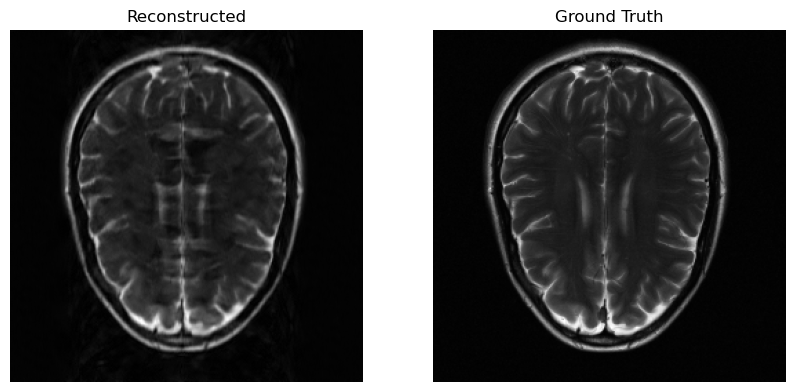

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(np.abs(output[1].squeeze().cpu().detach().numpy()), cmap='gray')
ax[1].imshow(img_gnd[1].squeeze().cpu().detach().numpy(), cmap='gray')

ax[0].set_title('Reconstructed')
ax[1].set_title('Ground Truth')

ax[0].axis('off')
ax[1].axis('off')

# compare g1(x2) and g2(x2), g2(x1) and g1(x1)

In [7]:
brain_im_und, brain_k_und, brain_mask, brain_img_gnd, brain_k_gnd = next(iter(brain_loader))
knee_im_und, knee_k_und, knee_mask, knee_img_gnd, knee_k_gnd = next(iter(knee_loader))

with torch.no_grad():
    _, g11 = model1(brain_im_und.to(device), brain_k_und.to(device), brain_mask.to(device))
    _, g12 = model1(knee_im_und.to(device), knee_k_und.to(device), knee_mask.to(device))

    _, g21 = model2(brain_im_und.to(device), brain_k_und.to(device), brain_mask.to(device))
    _, g22 = model2(knee_im_und.to(device), knee_k_und.to(device), knee_mask.to(device))

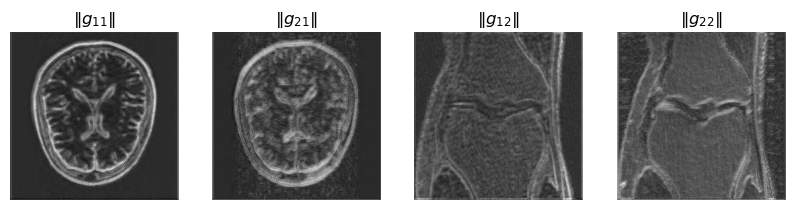

In [36]:
fig, ax = plt.subplots(1, 4, figsize=(10, 5))

ax[0].imshow(np.abs(g11[-1][-1][1].sum(dim=0, keepdim=True).squeeze().cpu().detach().numpy())**0.5, cmap='gray')
ax[2].imshow(np.abs(g12[-1][-1][0].sum(dim=0, keepdim=True).squeeze().cpu().detach().numpy())**0.5, cmap='gray')
ax[1].imshow(np.abs(g21[-1][-1][1].sum(dim=0, keepdim=True).squeeze().cpu().detach().numpy())**0.5, cmap='gray')
ax[3].imshow(np.abs(g22[-1][-1][0].sum(dim=0, keepdim=True).squeeze().cpu().detach().numpy())**0.5, cmap='gray')

ax[0].set_title('$\|g_{11}\|$')
ax[2].set_title('$\|g_{12}\|$')
ax[1].set_title('$\|g_{21}\|$')
ax[3].set_title('$\|g_{22}\|$')

for a in ax:
    a.axis('off')


In [19]:
g11[-1][-1][0].sum(dim=0, keepdim=True).shape

torch.Size([1, 256, 256])